# Worksheet 6
## Plotting
### Task 1

Create a histogram of a grayscale image manually using Matplotlib (you can load an RGB image and convert it to grayscale), without using the OpenCV built-in function cv2.calcHist. Instead, you are to create an array of 255 locations, initially zeroed. Use `ravel()` function to flatten the image and `hist()` function to display your plot in 256 bins. Each of these locations corresponds to a count of pixels at a particular intensity level (location 1 is black, 255 is white,…)  Display the original grayscale image and the histogram next to each other

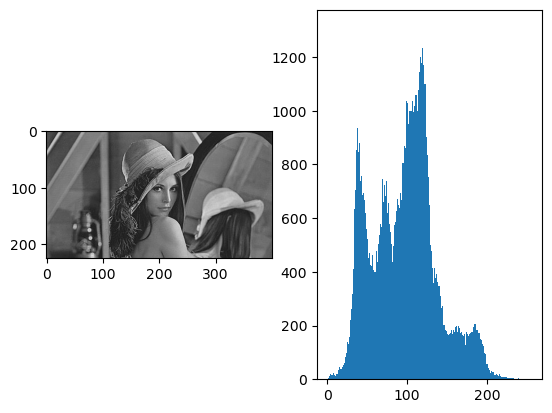

In [3]:
import random

import matplotlib.pyplot as plt
import numpy as np
import cv2

ML = cv2.imread('../Practice-Images/lena.jpg')
ML_G = cv2.cvtColor(ML,cv2.COLOR_BGR2GRAY)

fig,axis = plt.subplots(1,2)
axis[0].imshow(ML_G, cmap=plt.cm.gray)
axis[1].hist(ML_G.ravel(),256,[0,256])
plt.show()

### Task 2

a)	Create a new drawing with Microsoft Paint. In it include a few black dots. Save it as a `256-colour bitmap`.
b)	Create a new python file, and load the bitmap as a grayscale image. Display it in a new figure.
c)	Loop through all the pixels in the image to find the ones that are black (luminance 0). Use the following commands to draw red circles on the image around the black pixels:

`cv2.circle(img, center=(y,x), radius=10, color=(255,0,0), thickness=3)`

d)	Keep a count of all the black pixels and display it on the figure afterward (e.g. bottom right corner) using the following code


(1094, 1641)


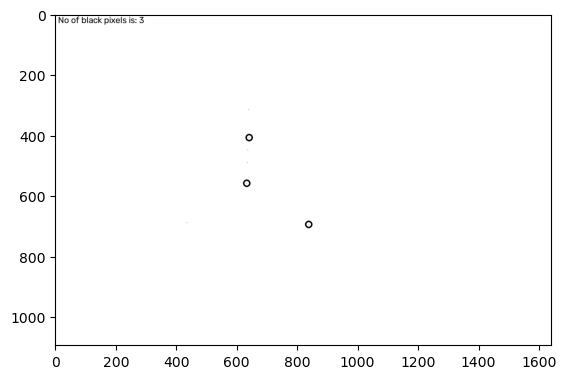

3


In [12]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

MD = cv2.imread('../Practice-Images/dots.bmp')
MD = cv2.cvtColor(MD,cv2.COLOR_BGR2GRAY)
height, width = MD.shape

dotCount = 0

for y in range(height):
    for x in range(width):
        if MD[y,x] == 0:
            # Update the Counter:
            dotCount+=1
            # Draw Circle:
            cv2.circle(MD, center=(x,y), radius=10, color=(1,1,1), thickness=3)

label = 'No of black pixels is: ' + str(dotCount)
cv2.putText(MD, label, (10,30), cv2.FONT_HERSHEY_SIMPLEX,1,(1,1,1),1)

plt.imshow(MD, cmap=plt.cm.gray)
plt.show()
print(dotCount)

### Task 3

a)	Create a new Python file, and generate a random RGB image 15 pixels wide by 15 pixels long. Each pixel can have a value of red which is 0 or 255, a value of blue which is 0 or 255, and a value of green which is 0 or 255. Display it in a new figure.
Thus the only colours that can be generated are the following:
•	White (255,255,255)
•	Black (0,0,0)
•	Red (255,0,0)
•	Green (0,255,0)
•	Blue (0,0,255)
•	Yellow (255,255,0)
•	Magenta (255,0,255)
•	Cyan (0,255,255)
b)	Loop through all the pixels in the image and circle the red pixels with red circles, the blue pixels with blue circles, and the green pixels with green circles.

c)	Keep a count of all the red, blue and green pixels separately and display the info on the figure afterward.


False [0 0 0] [255   0   0]
No of red pixels is: 22, no of green pixels is: 32, no of blue pixels is: 30


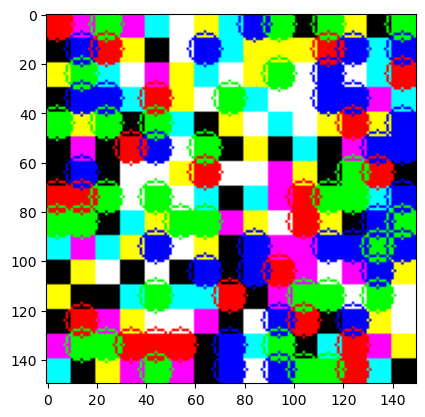

In [9]:
from numpy import random
import numpy as np

M = np.zeros([15,15,3], dtype='uint8')
height, width, col = M.shape

value = [0, 255]
red = np.array([255,0,0])
green = np.array([0,255,0])
blue = np.array([0,0,255])

count_r = 0
count_g = 0
count_b = 0

for y in range(height):
    for x in range(width):
        M[x,y] = [np.random.choice(value), np.random.choice(value), np.random.choice(value)]

M_L = cv2.resize(M, dsize=(150,150), interpolation = cv2.INTER_AREA)

for y in range(height):
    for x in range(width):
        if np.array_equal([M[y,x]],[red]):
            count_r += 1
            cv2.circle(M_L, center=((x*10)+4,(y*10)+4), radius=7, color=(255,0,0), thickness= 1)
        elif np.array_equal([M[y,x]],[green]):
            count_g += 1
            cv2.circle(M_L, center=((x*10)+4,(y*10)+4), radius=7, color=(0,255,0), thickness= 1)
        elif np.array_equal([M[y,x]],[blue]):
            count_b += 1
            cv2.circle(M_L, center=((x*10)+4,(y*10)+4), radius=7, color=(0,0,255), thickness= 1)

label = 'No of red pixels is: ' + str(count_r) + ', no of green pixels is: ' + str(count_g) + ', no of blue pixels is: ' \
        + str(count_b)


if np.array_equal( [M[y,x]],[red]):
    print('True')
else:
    print('False', M[y,x], red)

print(label)
plt.imshow(M_L)
plt.show()